In [28]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import plotly.express as px

In [26]:
pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2936 sha256=919e8ff5163964eda39eadd9d17e6435a5444e73fc6e2ed456570d93f7fb73a4
  Stored in directory: /home/jovyan/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 15.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 8.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
path = 'thermal data.xlsx'
df =pd.read_excel(path,
                  engine = 'openpyxl'
                 )
df.head(2)

,TimeStemp,camA400IR->tandem1.Min,TimeStemp.1,camA400IR->tandem1.Max,TimeStemp.2,camA400IR->tandem1.Avg
0,13:13:44.800000,18.7,13:13:44.800000,24.7,13:13:44.800000,20.4
1,13:13:45.500000,18.9,13:13:45.500000,23.8,13:13:45.500000,20.4


In [5]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16960 entries, 0 to 16959
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TimeStemp                16960 non-null  object 
 1   camA400IR->tandem1.Min   16960 non-null  float64
 2   TimeStemp.1              16960 non-null  object 
 3   camA400IR->tandem1.Max   16960 non-null  float64
 4   TimeStemp.2              16960 non-null  object 
 5   camA400IR->tandem1.Avg   16960 non-null  float64
dtypes: float64(3), object(3)
memory usage: 795.1+ KB


In [7]:
df.drop(['TimeStemp', 'TimeStemp.2', ],
        axis = 1,
        inplace = True
        )

In [8]:
df.rename(columns={'camA400IR->tandem1.Min ' : 'TempMin', 'camA400IR->tandem1.Max ' : 'TempMax', 'camA400IR->tandem1.Avg ' : 'TempAvg' , 'TimeStemp.1' : 'Time' ,},
          inplace = True
         )

In [9]:
df = df[['Time', 'TempMin', 'TempAvg', 'TempMax' ]]

In [10]:
df.head(2)

,Time,TempMin,TempAvg,TempMax
0,13:13:44.800000,18.7,20.4,24.7
1,13:13:45.500000,18.9,20.4,23.8


In [11]:
all(isinstance(column, str) for column in df.columns)

True

In [12]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.1


In [19]:
df.sort_values(['Time'], ascending=True, axis=0, inplace=True)

In [20]:
df.head(2)

,Time,TempMin,TempAvg,TempMax
0,13:13:44.800000,18.7,20.4,24.7
1,13:13:45.500000,18.9,20.4,23.8


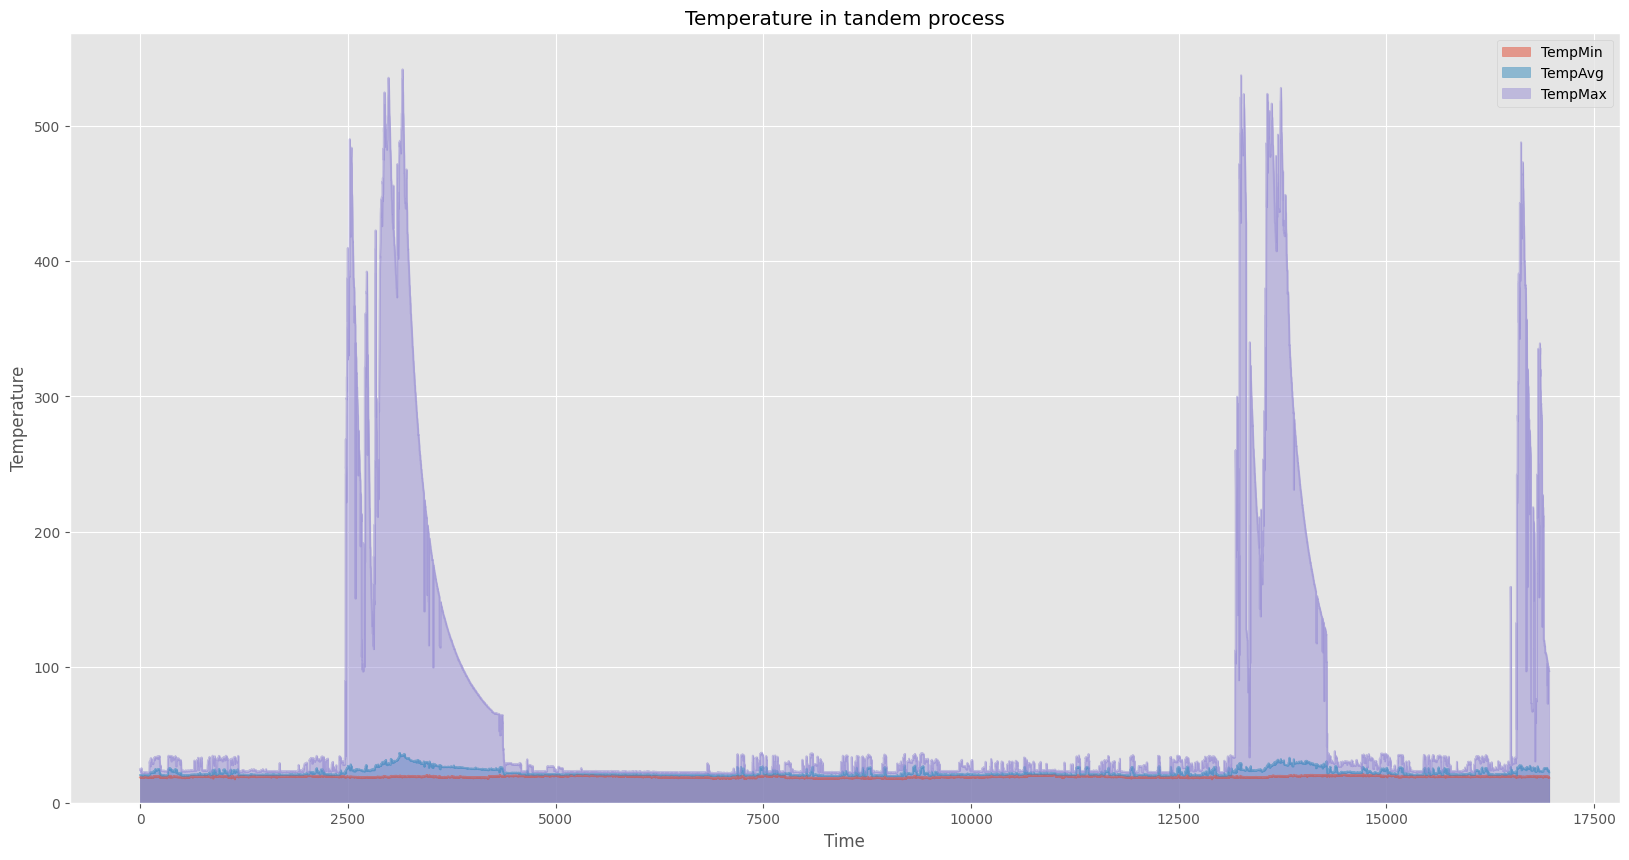

In [21]:
df.plot(kind='area',
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Temperature in tandem process')
plt.ylabel('Temperature')
plt.xlabel('Time')

plt.show()